## Part1 - Predicting the Automobile Insurance Claim

#### Summary

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. 

##### Purpose of the project

The purpose of this project is to detect the factors which influence the insurance claim and the amount of the claim. 
And to build a model which predicts the insurance claim beforehand so that it can make business decisions accordingly.
We will be using regression techniques for prediction as the target is not categorical. 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data into the notebook
df=pd.read_csv("Auto_insurance_claim.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#Checking the shape of the dataframe
df.shape
#There are 9134 rows and 26 columns in the dataset

(9134, 26)

In [4]:
#checking the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

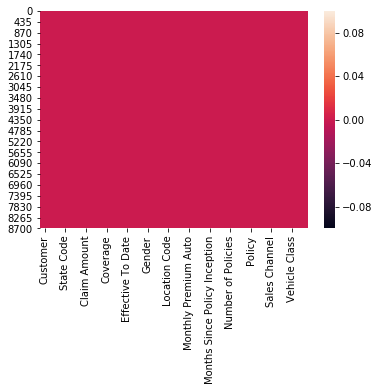

In [5]:
#Checking for missing values
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()
#There are no null values in the dataset

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### Univariate Analysis

In [7]:
#Check the unique value counts of the columns 
for i in df.columns:
    print(df[i].value_counts())
    print()

JL71713    1
LB59405    1
BV69462    1
WB68229    1
SC11374    1
GY87675    1
RE68901    1
ZI86917    1
YH23384    1
UK79109    1
UY13430    1
JT27173    1
JK16503    1
GT65065    1
PO90615    1
NJ28041    1
AY18433    1
XP50892    1
GW43195    1
CM94425    1
IM78342    1
EP46328    1
DF97701    1
DK69871    1
NL85206    1
KW95891    1
AQ11656    1
WH83589    1
OB21477    1
VK94891    1
OH60605    1
HB59616    1
GE87503    1
SB50826    1
PT64580    1
YC11951    1
QN62502    1
AC79024    1
AO46433    1
WK18603    1
PU98976    1
FK10455    1
PZ81131    1
SB24397    1
UU77151    1
TF10720    1
ZS96174    1
GJ70481    1
NE49052    1
WB58031    1
GX37592    1
HR50405    1
YM98727    1
VU18023    1
SF32458    1
LE91297    1
HV50891    1
EJ86526    1
MC30750    1
UK45178    1
WJ55369    1
OL82456    1
XQ19793    1
JA76884    1
TS11219    1
HZ62410    1
TF68928    1
DY87071    1
TY95197    1
OX87524    1
TX35617    1
MS11057    1
PD27940    1
FL69363    1
HF75891    1
WE68644    1
LL67008    1

65     348
66     307
71     304
73     302
63     289
69     287
67     284
61     277
72     275
68     270
64     266
74     258
62     257
70     249
112    124
113    113
109    113
110    112
102    111
103    109
106    108
107    105
83     105
92     101
114     99
118     99
117     98
101     98
119     98
116     98
96      96
104     96
99      94
86      94
111     92
105     91
76      90
88      88
82      86
95      85
79      84
84      82
115     81
108     81
90      81
80      80
94      79
87      77
89      77
78      76
97      73
85      71
77      70
81      69
93      68
91      66
98      63
100     62
139     51
131     45
122     44
124     42
136     40
125     39
129     39
126     39
137     39
133     37
132     32
121     32
128     31
138     30
130     28
127     28
135     27
123     27
134     24
181     21
199     18
185     15
194     15
196     14
180     13
198     13
190     12
186     12
192     12
193     12
187     12
189     11
182     11

Observations
1. There is only one country code USA. So the data belongs to the country USA only.

2. There are Five states mentioned in the dataset - Missouri, Iowa, Nebraska, Oklahoma and Kansas.

3. The two values in response column are No and Yes. For 7826 cases, there has been 'No' as response and for 1308 cases, there has been 'Yes' as response.

4. There are three types of coverage. 5568 are covered under Basic, 2742 are covered under Extended and 824 are covered under Premium.

5. Education has been seggregated into five types. 
a. High School or Below are 2622 counts
b. College are 2681 counts
c. Bachelor are 2748 counts
d. Masters are 741 counts
e. Doctors are 342 counts

6. Employment status has been divided into five types:
a. Employed are of 5698 counts.
b. Unemployed are of 2317 counts.
c. 432 are on medical leave.
d. 405 are disabled and 
e. 285 are retired.

7. Gender classification is as below:-
a. Male is 4658.
b. Female is 4476.

8. Location code classification is as below:-
a. Suburban has 5779 claims
b. Rural is 1773 claims
c. Urban is 1582 claims

9. Marital Status classification is as below:-
a. 5298 are Married
b. 2467 are Single and 
c. 1369 are divorced

10. Number of open compliants classification are:-
0 --    7252,
1 --   1011,
2 --    374,
3 --    292,
4 --    149,
5 --     56

11. Types of policy are:-
Personal Auto     6788
Corporate Auto    1968
Special Auto       378

12. Policy are:-
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66

13. Claim reasons are:-
Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024

14. Sales Channel categories are:-
Agent          3477
Branch         2567
Call Center    1765
Web            1325

15. Vehicle class categories are:-
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163

16. Vehicle size categories are:-
Medsize    6424
Small      1764
Large       946


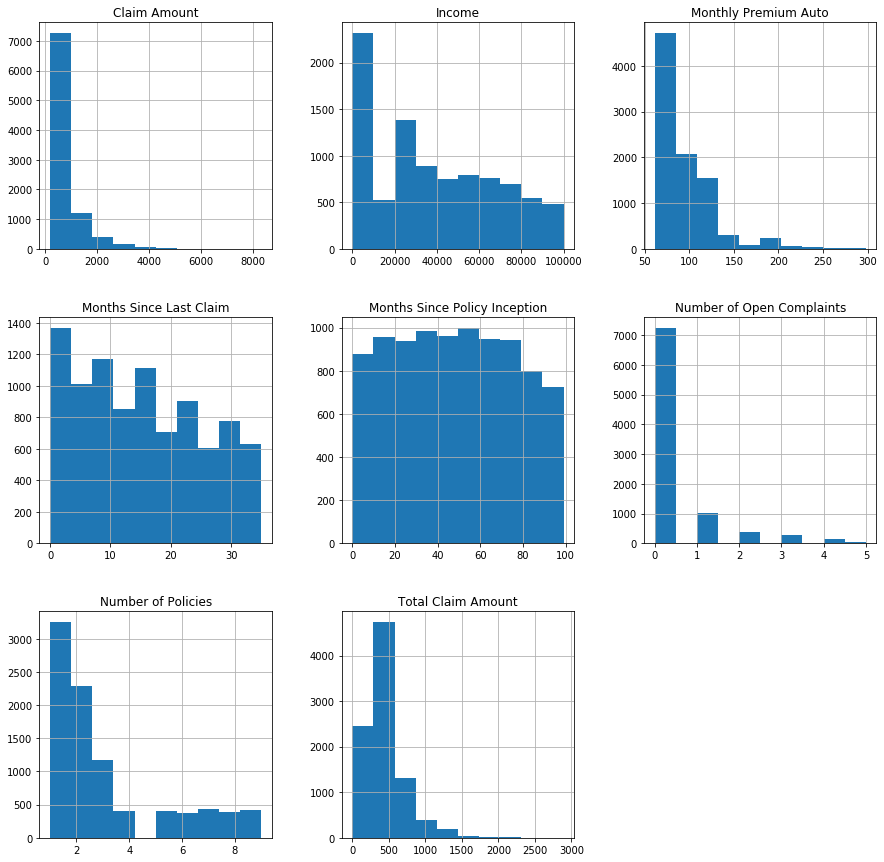

In [8]:
#checking the distribution of the data
df.hist(figsize=(15,15))
plt.show()

1) Most of the claims are within 1800. The claim amount column is right skewed.
2) Most of the income is within 10,000. Next freqeunt is between 20,000 to 30,000.
3) Monthly premium amount mostly is within 60-75.
4) Months since last claim indicates that the claims are frequent.
5) Months since policy inception indicates that there has been policies since over 9 years as well.
6) Most of the claims have no open compliants
7) Most of the people have only one policy followed by two.
8) Most of the complaints are between 250 and 500.

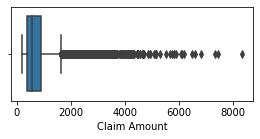

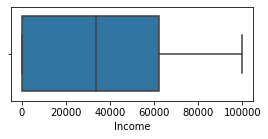

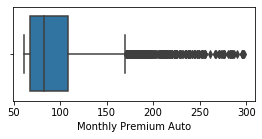

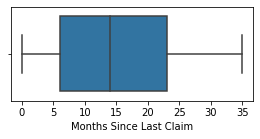

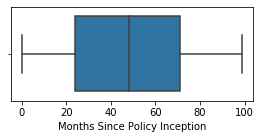

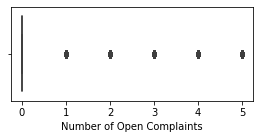

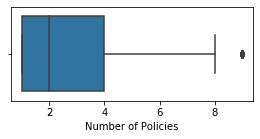

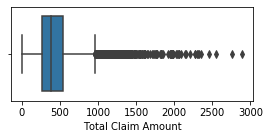

In [9]:
#checking the outliers in the data
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df[i])

Observations
1) There are outliers in the column Total Claim Amount, Monthly premium auto and claim amount. Only one value seems to be outlier in number of policies.

#### Statistical Analysis

In [10]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Observation
1. There are outliers in the claim amount and total claim amount.
2. There are claimants who are not earning any amount, hence the minimium income is zero.
3. Average Months since inception of policy is 48 months or 4 years. The max is 99 months or 8.25 years.
4. The average months since last claim is 15 months and max is 35 months. The minimum is 0, this needs to be investigated further.



#### Bivariate Analysis

##### Analysing the data by grouping 

In [11]:
#grouping by state
df.groupby('State').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
State,,,,,,,,
Iowa,807.790119,37557.283353,93.763937,14.891196,48.237985,0.363706,2.973856,433.012542
Kansas,802.147227,38122.733083,92.031328,15.562657,49.229323,0.412281,2.928571,436.343596
Missouri,800.364776,37558.946667,93.495238,15.082540,47.648889,0.382540,2.967619,437.819268
Nebraska,786.134149,37405.402231,91.884909,15.097475,47.781562,0.383441,3.067528,425.361446
Oklahoma,805.670684,38369.605442,94.278912,15.333333,48.530612,0.428571,2.776644,438.750566


Observations:
1. Nebraska has lowest claim when compared to other states.
2. Income of Nebraska is the lowest, followed by Lowa and Missouri.
3. Avg monthly premium of Nebraska is the lowest and Oklahoma has highest mean montly premium.
4. Avg month since policy inception is same for all the states. Kansas is little higher averaging to 49 months. Rest all are around 47 and 48.
5. Oklahoma has less avg no. of policies around 2.77 whereas others come around 3.

In [12]:
#grouping by response
df.groupby('Response').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Response,,,,,,,,
No,803.002230,37509.190008,93.065040,15.165346,48.030923,0.388065,2.986583,432.084497
Yes,785.487136,38544.027523,94.142202,14.688073,48.266055,0.362385,2.844037,446.080868


Observation:
1. In the column response for category No, claim amount is 803, comparitively little higher than Yes at 785.
2. However, the average total claim amount for no is lesser at 432 when compared to yes at 445.
3. The average income for category no is at 37509 which is lesser than yes category at 38544.

In [13]:
#grouping by coverage
df.groupby('Coverage').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Coverage,,,,,,,,
Basic,719.070642,38145.834770,82.173851,14.974677,47.924928,0.384698,2.986530,379.036312
Extended,878.967761,36380.099927,103.579504,15.221371,47.982130,0.398979,2.954048,480.578885
Premium,1089.560308,38607.120146,133.381068,15.509709,49.282767,0.333738,2.868932,651.390241


Observation:
1. The claim amount for lowest in Basic is 719, and little higher for Extended it is 879 and for premium it is highest at 1089.
2. Income doesn't have much impact on Coverage as avg income opting for Basic coverage is 38145 where as avg income opting for Extended coverage is 36380 and opting for premium is 38607.
3. It is obvious that avg Monthly premium is lowest for Basic at 82.17, higher for Extended at 103.5 and highest for premium at 133.38.
4. The avg months since last claim doesn't show much difference. For Basic it is 14.97, extended it is 15.22 and premium it is 15.51.
5. No. of open complaints is less for premium class at 0.33, 0.38 for basic and highest for extended by 0.399.
6. The avg no of policies of premium class are least at 2.86, extended is at 2.95, Basic is highest at 2.98.
7. Total claim amount is highest for premium at 651, followed by extended at 480 and basic at 379.

In [14]:
#grouping by Education
df.groupby('Education').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Education,,,,,,,,
Bachelor,787.266041,37426.814774,92.495633,14.834789,48.244905,0.389010,2.981441,427.993988
College,785.106464,37357.165983,92.665423,15.432301,47.901156,0.420739,2.893696,423.812895
Doctor,752.034484,42353.128655,90.713450,15.260234,46.502924,0.406433,3.011696,338.186584
High School or Below,829.670903,35583.929443,94.638444,14.978642,47.661327,0.349733,3.028986,487.189739
Master,824.348469,44768.187584,94.041835,15.199730,50.134953,0.348178,2.928475,350.237366


Observation
1. High School or below and Masters have slightly higher claim amount than the rest.
2. Masters earn average income more than others, followed by Doctors.
3. Masters and High School or below pay comparitively higher monthly premium.
4. Masters and High School or below have lesser average of number of open complaints.
5. Total claim amount is highest for High School or below followed by Bachelor, college, Master and Doctor.

In [15]:
#grouping by Employment Status
df.groupby('EmploymentStatus').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
EmploymentStatus,,,,,,,,
Disabled,784.788935,20045.582716,93.674074,14.893827,47.469136,0.276543,2.886420,474.711480
Employed,821.911775,56384.884521,93.212706,15.032994,47.800456,0.392594,2.970165,358.275705
Medical Leave,764.182244,20292.770833,90.011574,15.793981,48.141204,0.328704,2.981481,471.933903
Retired,748.786514,20554.960993,91.418440,14.404255,48.531915,0.397163,2.609929,489.901069
Unemployed,763.631976,0.000000,93.973241,15.244281,48.747087,0.391886,3.010790,599.579795


Observations:
1. Unemployed have more total claim amount, followed by retired, disabled, people on medical leave and employed.


In [16]:
#grouping by Gender Status
df.groupby('Gender').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Gender,,,,,,,,
F,809.660237,38108.176471,93.087162,14.844998,47.949764,0.387076,2.928081,412.856483
M,790.955149,37188.253575,93.356792,15.359249,48.184093,0.381591,3.005809,456.184439


Observations
1. The average claim amount of female is higher than of male. However the avg total claim amount of male is higher than of female.
2. The average income of female is higher than of male. However, male pays slightly higher premium at 93.35 when compared to female at 93.087.
3. Male claim more frequently than female as months since last claim is 14.84 for female and for male it is 15.35.
4. No. of open complaints is slightly higher for female at 0.387 when compared to male at 0.381.
5. No. of policies for female is slightly lower than that of male.


In [17]:
#grouping by Gender Status
df.groupby('Location Code').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Location Code,,,,,,,,
Rural,795.369916,56002.503102,89.805979,15.445572,48.340102,0.386915,2.971235,109.905095
Suburban,800.445741,27201.051912,95.227029,15.044471,47.707735,0.385188,2.956048,562.159870
Urban,806.413293,55294.053097,89.710493,14.898230,49.059418,0.378635,2.997472,329.572329


Observations
1. The claim amount of urban is highest at 806, followed by Suburban at 800 and Rural at 795. The total claim amount is least for rural at 109 followed by urban at 329 and suburban at 562.
2. Surprisingly the average income of rural is much better than suburban and slightly higher than urban also.
3. Despite having lowest mean income, Suburban contributes more average monthly premium than rural or urban.


In [18]:
#grouping by state
df.groupby('Marital Status').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Marital Status,,,,,,,,
Divorced,824.123913,40694.592403,92.602630,14.711468,49.666910,0.388605,2.841490,403.704718
Married,807.896697,43814.424877,93.068705,15.210457,48.135523,0.382220,3.000000,384.517033
Single,771.483702,22749.407783,93.884880,15.067288,47.023105,0.386704,2.962708,557.407396


Observations
1. The Total claim amount of Single is highest at 557, followed by divorced at 403 and single at 384.
2. The average income of married is more at 43814, followed by divorced at 40694 and single least at 22749. For singles, age factor might also be a reason for less salary.
3. The average monthly premium is paid highest by singles followed by married and divorced.
4. The average month since last claim for married is highest at 15.2 followed by single at 15.06 and divorced at 14.71.


In [19]:

#grouping by Number of Open Complaints
df.groupby('Number of Open Complaints').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
Number of Open Complaints,,,,,,,
0,805.882135,37575.857694,93.335907,15.056260,48.280199,2.966492,437.175989
1,816.134995,37819.774481,93.256182,15.340257,46.550940,2.921860,417.814479
2,817.840708,37271.393048,94.168449,15.211230,47.189840,2.981283,437.118993
3,733.715963,39548.609589,91.527397,14.671233,47.006849,3.273973,410.986607
4,589.326430,37718.986577,88.516779,16.208054,49.214765,2.570470,423.094380
5,614.567578,37835.232143,92.446429,14.482143,55.767857,3.071429,457.583604


Observations
1. The number of open complaints doesn't seem to have any linear relationship with monthly premium amount.

In [20]:

#grouping by Number of Open Complaints
df.groupby('Policy Type').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Policy Type,,,,,,,,
Corporate Auto,781.440955,37782.615854,93.238313,15.422256,47.958333,0.358232,2.984248,430.312188
Personal Auto,802.736353,37544.292722,93.230849,15.020035,48.199175,0.391131,2.965822,434.828219
Special Auto,859.424504,39036.142857,92.912698,14.785714,46.201058,0.399471,2.878307,440.472770


Observations:
1. The Special Auto has highest total claim amount at 859, followed by Corporate auto at 430 and Personal Auto at 434.
2. Income of special auto is the highest followed by corporate auto and personal auto.


In [21]:
#grouping by Number of Open Complaints
df.groupby('Policy').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Policy,,,,,,,,
Corporate L1,847.492822,34934.119777,93.763231,14.958217,51.133705,0.359331,2.857939,437.787660
Corporate L2,759.769529,37895.423529,94.791597,15.578151,48.396639,0.315966,3.065546,439.183340
Corporate L3,770.772196,38724.913215,92.141026,15.495069,46.576923,0.382643,2.981262,422.460088
Personal L1,798.976202,38240.625000,93.269355,15.052419,48.060484,0.347581,3.104839,441.062637
Personal L2,805.490934,37032.636192,92.713007,15.066918,47.889727,0.413289,2.884543,433.757310
Personal L3,802.391160,37609.173964,93.537653,14.979276,48.441039,0.393170,2.965849,433.235047
Special L1,833.276321,38546.848485,91.242424,12.181818,44.181818,0.424242,2.303030,463.236864
Special L2,832.690636,38616.750000,93.585366,15.219512,45.292683,0.390244,3.012195,432.603295
Special L3,900.709196,39719.074324,92.912162,15.466216,48.108108,0.398649,2.986486,439.041442


Observations
1) All policies under Special have higher Total claim amount.
2) Corporate L2 has least claim.


In [22]:
#grouping by Number of Open Complaints
df.groupby('Claim Reason').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Reason,,,,,,,,
Collision,870.708558,30764.733209,96.947228,15.197495,51.442431,0.442697,3.197228,469.165640
Hail,739.675383,44014.951128,90.037936,15.219070,45.743336,0.320916,2.826042,408.778268
Other,717.994727,43495.460938,89.714844,14.703125,43.128906,0.351562,2.517578,392.847065
Scratch/Dent,799.788652,38551.767458,92.458101,14.865922,47.486732,0.384777,2.967877,423.391734


Observation
1) Most claim amount relates to collision followed by dent/scratch.
2) Those who claimed under collision pay the highest average premium at 97

In [23]:
#grouping by Number of Open Complaints
df.groupby('Vehicle Class').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Vehicle Class,,,,,,,,
Four-Door Car,663.172661,37798.692491,77.423718,15.156460,47.945034,0.401212,2.990262,351.760366
Luxury Car,1705.334840,38807.153374,212.116564,15.478528,51.858896,0.417178,2.981595,1130.288964
Luxury SUV,1712.299913,35598.021739,213.184783,15.277174,50.673913,0.353261,2.902174,1092.525076
SUV,1044.351182,36460.525056,120.164254,14.704900,47.022829,0.360802,2.878619,569.572999
Sports Car,1075.098933,35432.574380,121.878099,15.121901,50.258264,0.330579,3.030992,558.148000
Two-Door Car,667.103073,39123.372216,76.927359,15.267762,48.204136,0.379639,2.978791,350.542917


Observations
1. Luxury cars and Luxury SUVs have the major claim amount. Two door car and four door cars have least claim amount.
2. The monthly premium amount for luxury cars and SUV are the highest and four door cards and two door cars have least.
3. Luxury cars, Luxury SUVs and Sports car have higher months since policy inception around 50.

In [24]:
#grouping by Number of Open Complaints
df.groupby('Vehicle Size').mean()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Vehicle Size,,,,,,,,
Large,754.499573,35969.707188,91.464059,14.881607,48.101480,0.402748,2.821353,426.063559
Medsize,805.066175,37970.044209,93.532067,15.197073,47.948786,0.382783,2.975560,420.075376
Small,808.509593,37423.810658,93.021542,14.848073,48.466553,0.380385,3.009637,489.425571


Observation
1. Small vehicles have larger claim and larger monthly premium when compared to others.


#### Conclusion

###### The factors which inflence claim amount are

1) vehicle class (Luxury cars and Luxury SUVs have more claims)

2) claim reason (collision have more claims followed by sratch and net)

3) Policy Type (Special Auto have more claims and Corporate Auto L2 have less claims)

4) Coverage (Premium have more claims, followed by extension and by basic)

5) Employment status (UnEmployed have more Total claims and employed have less Total claims)

6) Education (High School or below and Masters have more claims)

7) Location code (Sub urban has more claims followed by urban and then by rural)

8) Marital status (Singles have more claim followed by divorced and then by married)

#### Removing columns which are not required
The Country column has only one value USA. 
Customer is unique value which can be removed.
State Code can be removed as State is available.
Effective to data is also a unique value which can be removed as there is a column months since policy inception which is more useful for our model.

In [25]:
df1=df.drop(['Customer','Country','Effective To Date', 'State Code'], axis=1)
df1.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


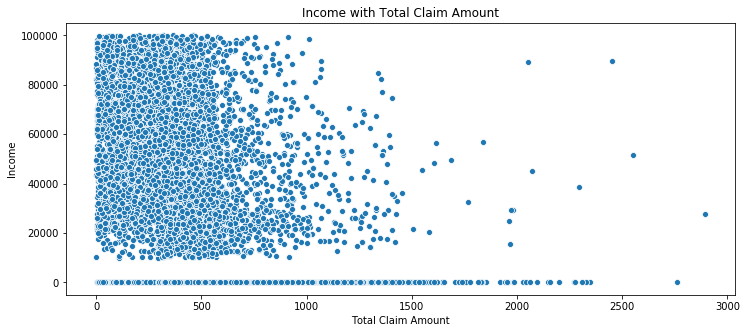

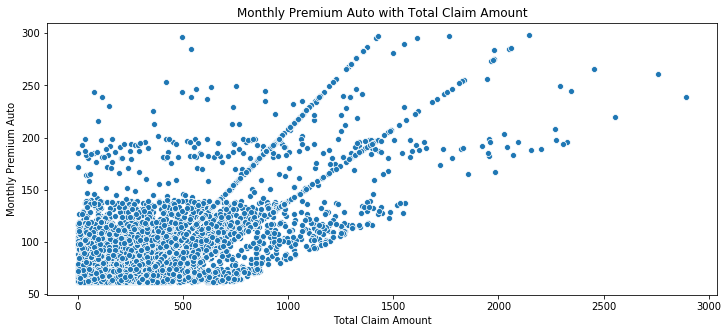

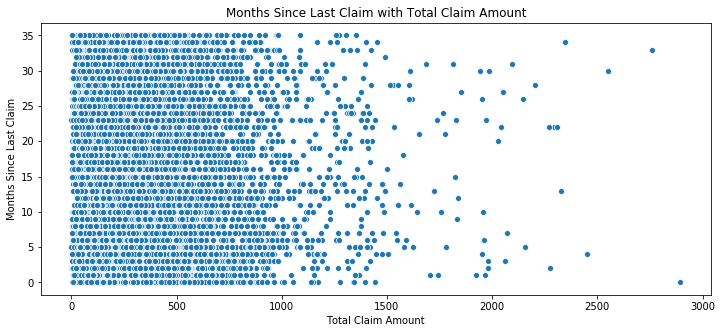

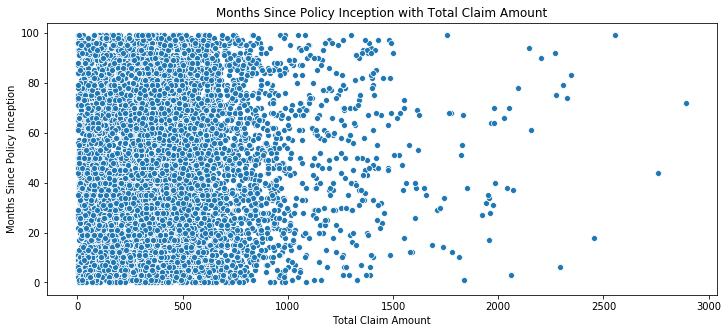

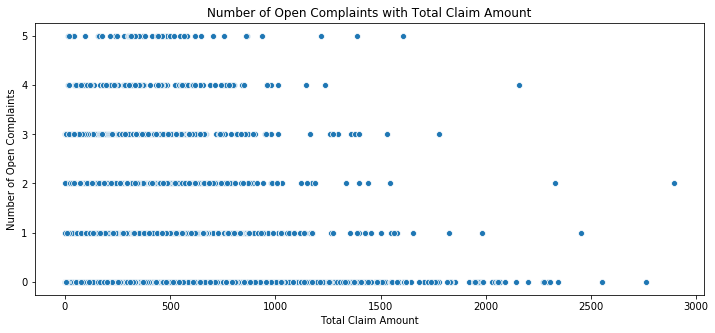

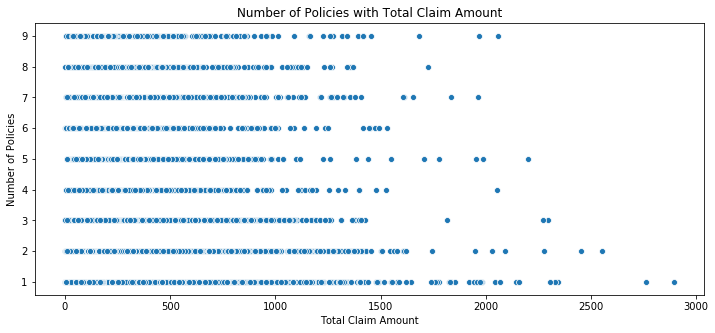

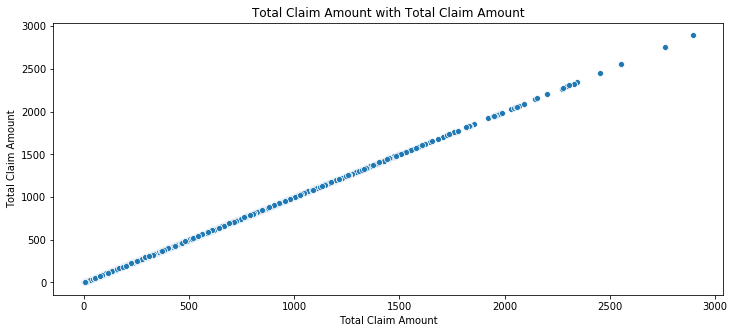

In [26]:
#scatter plots. checking the attributes relationship with the target 'Claim Amount'
cols=df1.iloc[:,3:-1]
for i in cols:
    if df[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Total Claim Amount')
        sns.scatterplot(x=df1['Total Claim Amount'], y=df1[i], data=df1)
        plt.show()

#### Correlation

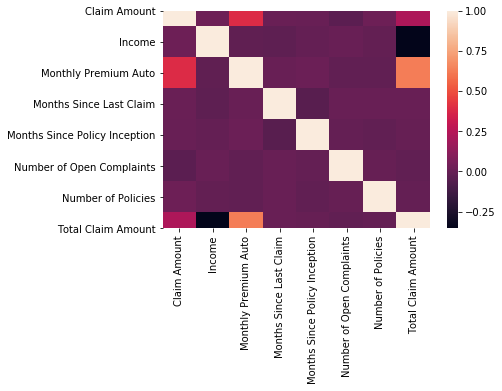

In [27]:
sns.heatmap(df1.corr())

In [28]:
df1.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


Observation:
1. Claim Amount has little positive correlation with Monthly Premium Auto.
2. Total Claim Amount has positive correlation with Monthly premium Auto.

In [29]:
#Using Labelencoder to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df1.columns:
    if df[i].dtypes=='O':
        df1[i]=lb.fit_transform(df1[i])
df1.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


#### removing outliers

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df1=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df1.shape)

The datashape before removing outliers is  (9134, 22)
The datashape after removing outliers is  (8470, 22)


#### splitting the data into input and output variables

In [31]:
y=pd.DataFrame(df1['Total Claim Amount'])
x=df1.drop('Total Claim Amount', axis=1)
x.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,0,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,0,1


In [32]:
y.head()

,Total Claim Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


#### checking the skewness

In [33]:
x.skew()

State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [34]:
#using sqrt method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [35]:
x.skew()
#This has reduced skewness to a certain extent

State                            0.019194
Claim Amount                     0.359738
Response                         2.030625
Coverage                         0.750235
Education                        0.337866
EmploymentStatus                 0.405261
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.695535
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.028948
Number of Policies               0.638404
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.213051
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [36]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

#### Pre Processing the data

In [37]:
x.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,5.625287,0.0,0.000000,0,0.693147,0,56274,1,1,2.061188,32,5,0.0,0.832555,0,2,0.000000,0,5,1
1,3,6.549584,0.0,0.832555,0,1.609438,0,0,1,2,2.133981,13,42,0.0,1.482304,1,5,1.386294,0,0,1
2,4,7.162198,0.0,1.048147,0,0.693147,0,48767,1,1,2.165952,18,38,0.0,1.048147,1,5,0.000000,0,5,1
3,2,6.640642,0.0,0.000000,0,1.609438,1,0,1,1,2.161673,18,65,0.0,1.442027,0,1,0.000000,2,3,1
4,1,5.643216,0.0,0.000000,0,0.693147,1,43836,0,2,2.074624,12,44,0.0,0.832555,1,3,0.000000,0,0,1


In [38]:
#We need to scale the data for normalising the input data and for the same we can use Minmaxscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.551121,-1.295202,-0.409822,-0.772467,-1.120269,-0.538311,-0.978045,0.604143,0.037243,-0.186015,-0.807910,1.683302,-1.535241,-0.473458,-1.077353,-1.717870,-1.109423,-1.084887,-1.035286,1.478254,-0.162023
1,0.974119,0.271404,-0.409822,1.162802,-1.120269,1.522910,-0.978045,-1.244638,0.037243,1.394274,0.369517,-0.204683,-0.208285,-0.473458,1.702836,0.372999,0.755394,1.567934,-1.035286,-0.892124,-0.162023
2,1.736738,1.309734,-0.409822,1.663946,-1.120269,-0.538311,-0.978045,0.357514,0.037243,-0.186015,0.886635,0.292155,-0.351739,-0.473458,-0.154862,0.372999,0.755394,-1.084887,-1.035286,1.478254,-0.162023
3,0.211499,0.425739,-0.409822,-0.772467,-1.120269,1.522910,1.022448,-1.244638,0.037243,-0.186015,0.817419,0.292155,0.616580,-0.473458,1.530497,-1.717870,-1.731029,-1.084887,0.836205,0.530103,-0.162023
4,-0.551121,-1.264814,-0.409822,-0.772467,-1.120269,-0.538311,1.022448,0.195515,-1.597204,1.394274,-0.590580,-0.304051,-0.136557,-0.473458,-1.077353,0.372999,-0.487818,-1.084887,-1.035286,-0.892124,-0.162023


In [39]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("the r2 score achieved at random_state", r_state, "is", r2score)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [40]:
lr=LinearRegression()
max_r2_score(lr,x,y)

the r2 score achieved at random_state 42 is 0.530793525522236
the r2 score achieved at random_state 43 is 0.5177102290914339
the r2 score achieved at random_state 44 is 0.5184586310139461
the r2 score achieved at random_state 45 is 0.5268338879902379
the r2 score achieved at random_state 46 is 0.5240458237202368
the r2 score achieved at random_state 47 is 0.49388387138218726
the r2 score achieved at random_state 48 is 0.5046550101934225
the r2 score achieved at random_state 49 is 0.5141829832212683
the r2 score achieved at random_state 50 is 0.5229738153484722
the r2 score achieved at random_state 51 is 0.5151669091568216
the r2 score achieved at random_state 52 is 0.5032935616441945
the r2 score achieved at random_state 53 is 0.5214952897660072
the r2 score achieved at random_state 54 is 0.5420454149749045
the r2 score achieved at random_state 55 is 0.5043115639052359
the r2 score achieved at random_state 56 is 0.5192296018797884
the r2 score achieved at random_state 57 is 0.513479198

In [41]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,test_size=0.20)

In [42]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [44]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [45]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.5229738153484722
The cross val score is 0.5192249403135377
The mean squared error is 24644.0996968297
The root mean squared error is 156.98439316323677




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.6406037723499782
The cross val score is 0.6232090289820452
The mean squared error is 18567.107529624944
The root mean squared error is 136.26117396244956




DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best

In [46]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.522974,0.519225,24644.099697,156.984393
1,KNeighborsRegressor,0.640604,0.623209,18567.107530,136.261174
2,DecisionTreeRegressor,0.672700,0.674682,16908.943579,130.034394
3,SVR,0.644240,0.623103,18379.271901,135.570173


In [47]:
#Let us try to boost our scores by trying boosters and lasso and ridge

#### Lasso

In [48]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [49]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

the r2 score achieved at random_state 42 is 0.5307403048896895
the r2 score achieved at random_state 43 is 0.518701777522716
the r2 score achieved at random_state 44 is 0.5202762853914921
the r2 score achieved at random_state 45 is 0.5275455936202542
the r2 score achieved at random_state 46 is 0.525812003176453
the r2 score achieved at random_state 47 is 0.4966800309995053
the r2 score achieved at random_state 48 is 0.5059671775874182
the r2 score achieved at random_state 49 is 0.514169793278754
the r2 score achieved at random_state 50 is 0.5228231139740805
the r2 score achieved at random_state 51 is 0.515842259567843
the r2 score achieved at random_state 52 is 0.5039093223772915
the r2 score achieved at random_state 53 is 0.5215520479717597
the r2 score achieved at random_state 54 is 0.5420198691593019
the r2 score achieved at random_state 55 is 0.5048733933665746
the r2 score achieved at random_state 56 is 0.5201940338312271
the r2 score achieved at random_state 57 is 0.5150086926809

In [50]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.5197311777843486


#### Ridge

In [51]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [52]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

the r2 score achieved at random_state 42 is 0.5307945667061481
the r2 score achieved at random_state 43 is 0.5177077925458857
the r2 score achieved at random_state 44 is 0.5184641873142449
the r2 score achieved at random_state 45 is 0.5268382593917833
the r2 score achieved at random_state 46 is 0.5240485674413237
the r2 score achieved at random_state 47 is 0.4938993526616351
the r2 score achieved at random_state 48 is 0.5046654313464554
the r2 score achieved at random_state 49 is 0.5141877817905601
the r2 score achieved at random_state 50 is 0.5229722539571818
the r2 score achieved at random_state 51 is 0.515176278283033
the r2 score achieved at random_state 52 is 0.5032986174412197
the r2 score achieved at random_state 53 is 0.5214990950898423
the r2 score achieved at random_state 54 is 0.5420443752666957
the r2 score achieved at random_state 55 is 0.5043117862961292
the r2 score achieved at random_state 56 is 0.5192332991068804
the r2 score achieved at random_state 57 is 0.5134915720

In [53]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.5194266347970362


#### Ensemble Techniques

##### Random Forest

In [54]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [57]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [58]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

the r2 score achieved at random_state 42 is 0.8407691973432732
the r2 score achieved at random_state 43 is 0.8383036079489321
the r2 score achieved at random_state 44 is 0.8270760851604133
the r2 score achieved at random_state 45 is 0.8278132051698366
the r2 score achieved at random_state 46 is 0.8270063260569667
the r2 score achieved at random_state 47 is 0.8222249522232048
the r2 score achieved at random_state 48 is 0.8154237379719955
the r2 score achieved at random_state 49 is 0.8194999057568694
the r2 score achieved at random_state 50 is 0.8232172465637012
the r2 score achieved at random_state 51 is 0.8208522393666885
the r2 score achieved at random_state 52 is 0.8373039793718472
the r2 score achieved at random_state 53 is 0.8122606185646899
the r2 score achieved at random_state 54 is 0.8424170481451534
the r2 score achieved at random_state 55 is 0.8423374475807792
the r2 score achieved at random_state 56 is 0.8209173225596563
the r2 score achieved at random_state 57 is 0.824708167

In [59]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8297630340820309


#### GradientBoostingRegressor

In [60]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [61]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y)

the r2 score achieved at random_state 42 is 0.8304269144455367
the r2 score achieved at random_state 43 is 0.8275663370232014
the r2 score achieved at random_state 44 is 0.8271967934167589
the r2 score achieved at random_state 45 is 0.8276597714922246
the r2 score achieved at random_state 46 is 0.8223259291538165
the r2 score achieved at random_state 47 is 0.8222055397515372
the r2 score achieved at random_state 48 is 0.8189126575568264
the r2 score achieved at random_state 49 is 0.816168010858817
the r2 score achieved at random_state 50 is 0.8205721984933013
the r2 score achieved at random_state 51 is 0.8100469505172322
the r2 score achieved at random_state 52 is 0.8299000342293033
the r2 score achieved at random_state 53 is 0.8142101594408828
the r2 score achieved at random_state 54 is 0.8357862605274036
the r2 score achieved at random_state 55 is 0.8265967676837067
the r2 score achieved at random_state 56 is 0.8180920300366168
the r2 score achieved at random_state 57 is 0.8201700837

In [62]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.8251253416393036


#### AdaBoostRegressor

In [63]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [64]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=50,learning_rate=1)
max_r2_score(ad,x,y)

the r2 score achieved at random_state 42 is 0.7148799657261158
the r2 score achieved at random_state 43 is 0.6999313548786996
the r2 score achieved at random_state 44 is 0.7138375227758507
the r2 score achieved at random_state 45 is 0.7234958965375485
the r2 score achieved at random_state 46 is 0.7026020205370062
the r2 score achieved at random_state 47 is 0.7042239701224808
the r2 score achieved at random_state 48 is 0.7204369395479013
the r2 score achieved at random_state 49 is 0.6808111412418041
the r2 score achieved at random_state 50 is 0.7035193294304594
the r2 score achieved at random_state 51 is 0.7066159444624667
the r2 score achieved at random_state 52 is 0.728971528269223
the r2 score achieved at random_state 53 is 0.740103912263642
the r2 score achieved at random_state 54 is 0.7332763481634841
the r2 score achieved at random_state 55 is 0.7078090164890305
the r2 score achieved at random_state 56 is 0.6808063549721083
the r2 score achieved at random_state 57 is 0.72027056753

In [65]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.7212555480381454


In [66]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.551,0.552,0.849,0.843,0.756],'Cross_val_score':[0.52,0.52,0.83,0.825,0.721]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.551,0.520
1,Ridge,0.552,0.520
2,RandomForestRegressor,0.849,0.830
3,GradientBoostRegressor,0.843,0.825
4,AdaBoostRegressor,0.756,0.721


In [67]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.522974,0.519225,24644.099697,156.984393
1,KNeighborsRegressor,0.640604,0.623209,18567.107530,136.261174
2,DecisionTreeRegressor,0.672700,0.674682,16908.943579,130.034394
3,SVR,0.644240,0.623103,18379.271901,135.570173


In [68]:
#by comparing the above results, we can conclude that Random Forest regressor is providing best scores. 
#So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=81,test_size=0.20)
rf=RandomForestRegressor(n_estimators=500)
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.847133123713914
The cross val score is 0.8303229927851529


In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rf,'Project11_Part1_Automobile_Insurance_Claim.pkl')

['Project11_Part1_Automobile_Insurance_Claim.pkl']